# 1. Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


# Install Gradio (Colab specific)
!pip install gradio -q
import gradio as gr


# 2. Load Dataset

In [ ]:
# Load diabetes dataset directly from URL
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv"

cols = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness",
        "Insulin", "BMI", "DiabetesPedigree", "Age", "Outcome"]

df = pd.read_csv(url, names=cols)
df.head(7)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1


In [ ]:
df.columns


Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigree', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
df.shape

(768, 9)

#3. Basic EDA (Data Understanding)

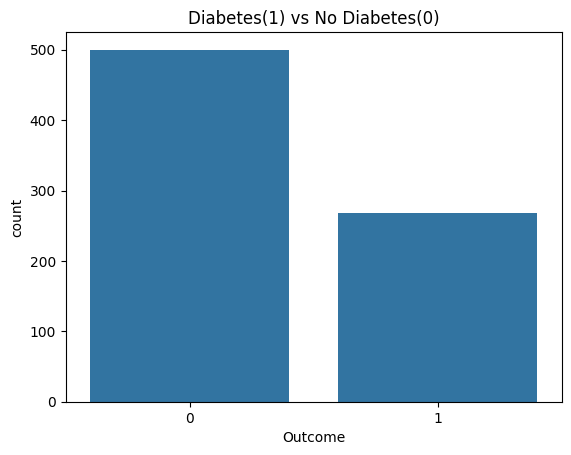

In [ ]:
df.describe()
df.isnull().sum()

# Outcome count
sns.countplot(data=df, x="Outcome")
plt.title("Diabetes(1) vs No Diabetes(0)")
plt.show()


#4. Feature Scaling

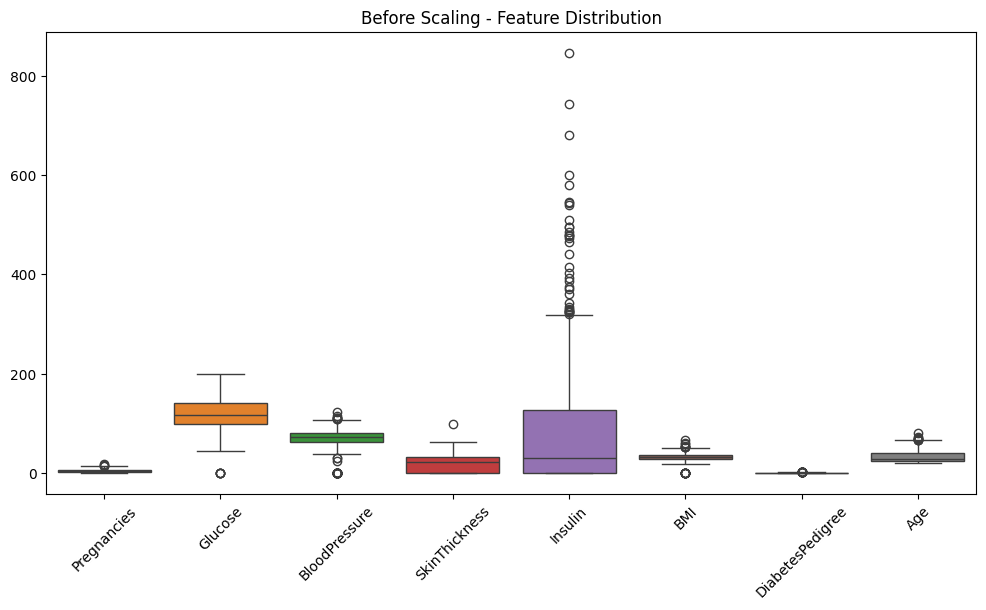

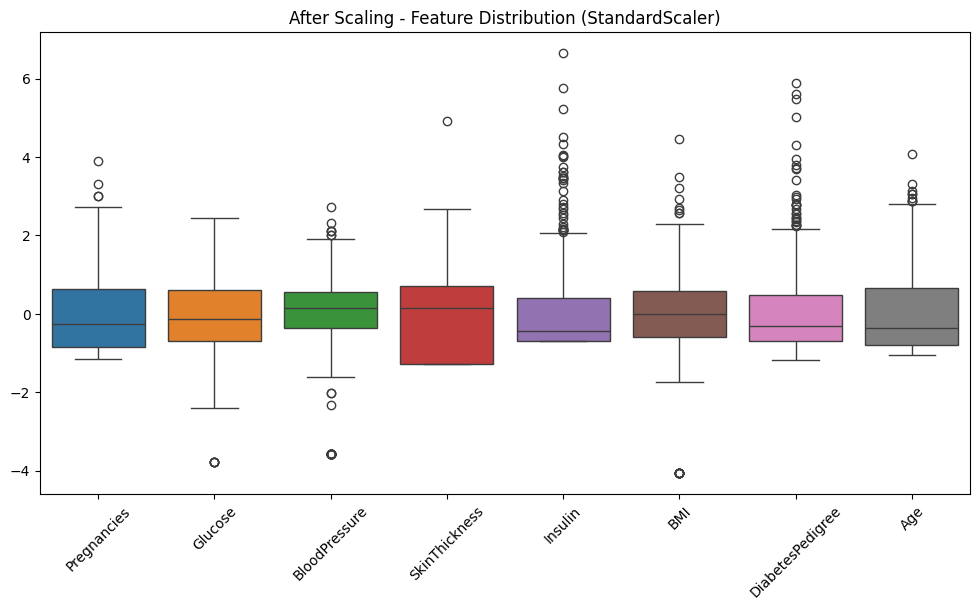

In [ ]:
# Before scaling
plt.figure(figsize=(12,6))
sns.boxplot(data=X)
plt.title("Before Scaling - Feature Distribution")
plt.xticks(rotation=45)
plt.show()

# After scaling
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)  # convert numpy -> DataFrame
plt.figure(figsize=(12,6))
sns.boxplot(data=X_scaled_df)
plt.title("After Scaling - Feature Distribution (StandardScaler)")
plt.xticks(rotation=45)
plt.show()


In [ ]:
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


#5. Train–Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.20, random_state=42
)


#6. Multiple Models

###Model 1: Logistic Regression

In [ ]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

pred1 = log_reg.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, pred1))


Logistic Regression Accuracy: 0.7532467532467533


###Model 2: Random Forest

In [ ]:
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

pred2 = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, pred2))


Random Forest Accuracy: 0.7337662337662337


###Model 3: XGBoost (Best performance)

In [ ]:
xgb = XGBClassifier(max_depth=4, learning_rate=0.1, n_estimators=200)
xgb.fit(X_train, y_train)

pred3 = xgb.predict(X_test)
print("XGBoost Accuracy:", accuracy_score(y_test, pred3))


XGBoost Accuracy: 0.7207792207792207


#7. Evaluation

Classification Report (XGBoost):
              precision    recall  f1-score   support

           0       0.80      0.75      0.77        99
           1       0.60      0.67      0.63        55

    accuracy                           0.72       154
   macro avg       0.70      0.71      0.70       154
weighted avg       0.73      0.72      0.72       154



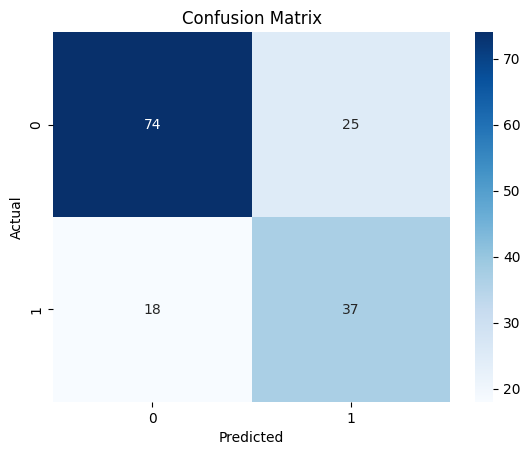

In [ ]:
print("Classification Report (XGBoost):")
print(classification_report(y_test, pred3))

cm = confusion_matrix(y_test, pred3)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


#Check Accuracy About All Model

#8. Predict for a New Person

In [ ]:
new_data = np.array([[0, 150, 72, 35, 0, 33.6, 0.627, 50]])
new_scaled = scaler.transform(new_data)

print("Prediction:", xgb.predict(new_scaled))


Prediction: [1]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [81]:


url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv"

cols = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness",
        "Insulin", "BMI", "DiabetesPedigree", "Age", "Outcome"]

df = pd.read_csv(url, names=cols)

# Features & Target
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train RandomForest Model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# -----------------------------
# Prediction Function
# -----------------------------
def predict_diabetes(Pregnancies, Glucose, BloodPressure, SkinThickness,
                     Insulin, BMI, DiabetesPedigree, Age):

    input_data = np.array([[Pregnancies, Glucose, BloodPressure, SkinThickness,
                            Insulin, BMI, DiabetesPedigree, Age]])
    prediction = model.predict(input_data)[0]

    if prediction == 1:
        return "🟥 Diabetes Detected"
    else:
        return "🟩 No Diabetes"

# -----------------------------
# Gradio Interface
# -----------------------------
inputs = [
    gr.Number(label="Pregnancies - ( গর্ভধারণের সংখ্যা )"),
    gr.Number(label="Glucose - ( রক্তে শর্করার মাত্রা )"),
    gr.Number(label="BloodPressure - ( রক্তচাপ )"),
    gr.Number(label="SkinThickness - ( ত্বকের নিচের চর্বির পরিমাপ )"),
    gr.Number(label="Insulin - ( রক্তের ইনসুলিন মাত্রা )"),
    gr.Number(label="BMI - ( ওজন ও উচ্চতা অনুযায়ী শরীরের চর্বির সূচক )"),
    gr.Number(label="DiabetesPedigree - ( পরিবারের মধ্যে diabetes history অনুযায়ী risk score )"),
    gr.Number(label="Age - ( রোগীর বয়স )")
]

outputs = gr.Textbox(label="Prediction Result - ( ফলাফল )")

gr.Interface(
    fn=predict_diabetes,
    inputs=inputs,
    outputs=outputs,
    title="Machine Learning-based Diabetes Prediction Made By Md Ismail Hossain",
    description="Enter patient data and click Submit to predict diabetes.\n"
    "রোগীর তথ্য দিন এবং “Submit” বাটনে ক্লিক করুন ডায়াবেটিস প্রেডিকশন করার জন্য।"
).launch()


It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://5884dc65a4eea3230f.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
